In [2]:
##4grt11 Circuit
##All Imports Here

#Non-qiskit imports
import numpy as np
import matplotlib.pyplot as plt
import time

#Qiskit imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, CXGate, SwapGate, CCXGate, RZGate
from qiskit.compiler import transpile
from qiskit.providers.fake_provider import FakeValencia
#from qiskit.quantum_info import Operator
from qiskit.circuit.random import random_circuit


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library import C3XGate

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
cal_qc = QuantumCircuit(qreg_q, creg_c)
#backend = Aer.get_backend('qasm_simulator')
backend = FakeValencia()
cal_qc.cx(qreg_q[4], qreg_q[1])
cal_qc.cx(qreg_q[3], qreg_q[0])
cal_qc.cx(qreg_q[1], qreg_q[4])
cal_qc.ccx(qreg_q[2], qreg_q[4], qreg_q[3])
cal_qc.append(C3XGate(), [qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])
cal_qc.draw(output='mpl')
layers = cal_qc.depth()

compiled_cal_qc = transpile(cal_qc, backend)

# Save the circuit to a QASM file
file_path = '4gt5_valencia.qasm'
with open(file_path, 'w') as file:
    file.write(compiled_cal_qc.qasm())

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

n_qbits = 5
data = 1

qreg_q = QuantumRegister(n_qbits, 'q')
creg_c = ClassicalRegister(data, 'c')

in_circuits = []

for i in range(16):
    in_qc = QuantumCircuit(qreg_q, creg_c)

    # Apply X gates based on the binary representation of 'i'
    binary_rep = format(i, '04b')
    for j in range(len(binary_rep)):
        if binary_rep[j] == '1':
            in_qc.x(qreg_q[j+1])

    in_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

    in_circuits.append(in_qc)

# Printing the circuit representations
for i, in_qc in enumerate(in_circuits):
    print(f"Circuit {i+1}:")
    print(in_qc)



Circuit 1:
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
q_4: ─░─
      ░ 
c: 1/═══
        
Circuit 2:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
     ┌───┐ ░ 
q_4: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 3:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
q_4: ──────░─
           ░ 
c: 1/════════
             
Circuit 4:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     ├───┤ ░ 
q_4: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════
             
Circuit 5:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
q_4: ──────░─
           ░ 
c: 1/════════
             
Circuit 6:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     

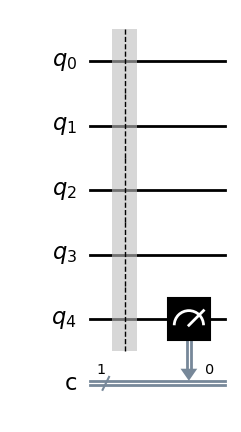

In [5]:
##Measurement/Output circuit = out_qc

out_qc = QuantumCircuit(qreg_q, creg_c)

out_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
out_qc.measure(qreg_q[4], creg_c[0])

out_qc.draw(output='mpl')


In [5]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in cal_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.x(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
    #new_depth_b =  modified_qc_before.depth()
    # Add the modified circuits to the list
    #if new_depth_b == layers:
        modified_circuits_before.append(modified_qc_before)
            
# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'x' and i in not_gate_indices:
            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.x(qargs[0])
            
            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'x' and j != i:
                    new_qc.data.pop(j)
            
            new_depth_b =  new_qc.depth()
            #print(new_depth_b)
            # Add the modified circuits to the list
            if new_depth_b == layers:
                new_circuits1.append(new_qc)
            # Add the modified circuit to the list
           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_qubit_{i}.png")
    compiled_new_qc = transpile(new_qc, backend)

    file_path = f"Trojan_4gt5_{i}.qasm"
    with open(file_path, 'w') as file:
        file.write(compiled_new_qc.qasm())
    print()





Modified Circuit (before) for qubit 0:

Modified Circuit (before) for qubit 1:

Modified Circuit (before) for qubit 2:

Modified Circuit (before) for qubit 3:

Modified Circuit (before) for qubit 4:

Modified Circuit (before) for qubit 5:



In [6]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in cal_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.h(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
    #new_depth_b =  modified_qc_before.depth()
    # Add the modified circuits to the list
    #if new_depth_b == layers:
        modified_circuits_before.append(modified_qc_before)
            
# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'h']
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'h' and i in not_gate_indices:
            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.h(qargs[0])
            
            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'h' and j != i:
                    new_qc.data.pop(j)
            
            new_depth_b =  new_qc.depth()
            #print(new_depth_b)
            # Add the modified circuits to the list
            if new_depth_b == layers:
                new_circuits1.append(new_qc)
            # Add the modified circuit to the list
           

def remove_duplicates(circuit_list):
    # Initialize an empty set to store the unique circuits
    unique_circuits = set()
    
    # Initialize a new list to store the circuits without duplicates
    new_circuit_list = []
    
    # Iterate over each circuit in the original list
    for circuit in circuit_list:
        # Convert the circuit to a custom string representation
        circuit_str = str(circuit)
        
        # Check if the circuit string is already in the set
        if circuit_str not in unique_circuits:
            # If not, add it to the set and the new list
            unique_circuits.add(circuit_str)
            new_circuit_list.append(circuit)
    
    return new_circuit_list

# Your list of circuits (assuming it is already defined)
# circuit_list = [circuit1, circuit2, circuit3, ...]

# Call the remove_duplicates function to get the new list without duplicates
new_circuit_list = remove_duplicates(new_circuits1)        


# Display and save the modified circuits
#for i, modified_qc_before in enumerate(modified_circuits_before):
    #print(f"Modified Circuit (before) for qubit {i}:")
    #modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
    #print()

for i, new_qc in enumerate(new_circuit_list):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"h_qubit_{i}.png")
    compiled_new_qc = transpile(new_qc, backend)

    file_path = f"Hadamard_4gt5_{i}.qasm"
    with open(file_path, 'w') as file:
        file.write(compiled_new_qc.qasm())
    print()




Modified Circuit (before) for qubit 0:

Modified Circuit (before) for qubit 1:

Modified Circuit (before) for qubit 2:

Modified Circuit (before) for qubit 3:

Modified Circuit (before) for qubit 4:

Modified Circuit (before) for qubit 5:



In [10]:
from itertools import combinations
new_circuits2 = []         

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']

    # Iterate over the instructions in the circuit
    for combination in combinations(not_gate_indices, 2):
        new_qc = modified_qc_before.copy()                             
            
        # Add the remaining gates from the original circuit to the new circuit
        for j in reversed(range(len(new_qc))):
            if j not in combination and new_qc[j][0].name == 'x':
                new_qc.data.pop(j)
        
        # Add the modified circuit to the list
        new_circuits2.append(new_qc)


for i, new_qc in enumerate(new_circuits2):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_{i}.png")
    print()

In [6]:
from qiskit import QuantumCircuit





# Generate circuits with an extra NOT gate from each circuit in modified_circuits_before
modified_cal_circuits = []
for modified_qc_before in modified_circuits_before:
    # Create a new circuit by combining modified_circuit with cal_qc
    modified_cal_circuit = cal_qc.copy()
    
    # Add the extra NOT gate from modified_circuit to modified_cal_circuit
    for instruction, qargs, cargs in modified_qc_before:
        if instruction.name == 'x':
            modified_cal_circuit.x(qargs[0])
    
    # Add the modified_cal_circuit to the list
    modified_cal_circuits.append(modified_cal_circuit)



for i, modified_cal_circuit in enumerate(modified_cal_circuits):
    print(f"Modified Circuit new for qubit {i}:")
    modified_cal_circuit.draw(output='mpl', filename=f"new_{i}.png")
    print()


Modified Circuit new for qubit 0:

Modified Circuit new for qubit 1:

Modified Circuit new for qubit 2:

Modified Circuit new for qubit 3:

Modified Circuit new for qubit 4:



In [14]:

cal_out_qc = cal_qc.compose(out_qc, front=False, inplace=False)
cal_out_qc.draw(output='mpl')
## in_qc + cal_out_qc= org_qc
for i, in_qc in enumerate(in_circuits):
    print(f"Input:{i}")
    org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
    org_qc.draw(output='mpl')
    # Run the circuit and get results
    shots = 1000    
    backend = FakeValencia()
    qc = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
    results = backend.run(qc,shots=shots).result()
    
    # Extract the counts from the results
    count = results.get_counts(qc)

    #sort the counts

    count = dict(sorted(count.items()))

    print(count)
    print(count[1])

    #draw a histogram

    

Input:0
{'0000': 916, '0001': 84}


KeyError: 1

In [9]:
for i, new_qc in enumerate(new_circuit_list):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        shots = [i for i in range(1000, 1501, 100)]
        for i in shots:
            print(f"Shots: {i}:")    
            backend = FakeValencia()
            qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
            results = backend.run(qc_noisy,shots=i).result()
            
            # Extract the counts from the results
            count_noisy = results.get_counts(qc_noisy)

            #sort the counts

            count_noisy = dict(sorted(count_noisy.items()))

            print(count_noisy)

            #draw a histogram

            

Infected circuit 0
Input:0
Shots: 1000:
{'0': 900, '1': 100}
Shots: 1100:
{'0': 997, '1': 103}
Shots: 1200:
{'0': 1082, '1': 118}
Shots: 1300:
{'0': 1170, '1': 130}
Shots: 1400:
{'0': 1251, '1': 149}
Shots: 1500:
{'0': 1347, '1': 153}
Input:1
Shots: 1000:
{'0': 896, '1': 104}
Shots: 1100:
{'0': 999, '1': 101}
Shots: 1200:
{'0': 1083, '1': 117}
Shots: 1300:
{'0': 1153, '1': 147}
Shots: 1400:
{'0': 1242, '1': 158}
Shots: 1500:
{'0': 1323, '1': 177}
Input:2
Shots: 1000:
{'0': 890, '1': 110}
Shots: 1100:
{'0': 985, '1': 115}
Shots: 1200:
{'0': 1083, '1': 117}
Shots: 1300:
{'0': 1160, '1': 140}
Shots: 1400:
{'0': 1239, '1': 161}
Shots: 1500:
{'0': 1360, '1': 140}
Input:3
Shots: 1000:
{'0': 869, '1': 131}
Shots: 1100:
{'0': 966, '1': 134}
Shots: 1200:
{'0': 1067, '1': 133}
Shots: 1300:
{'0': 1130, '1': 170}
Shots: 1400:
{'0': 1234, '1': 166}
Shots: 1500:
{'0': 1332, '1': 168}
Input:4
Shots: 1000:
{'0': 855, '1': 145}
Shots: 1100:
{'0': 962, '1': 138}
Shots: 1200:
{'0': 1055, '1': 145}
Shots:

Infected circuit 0
Input:0
{'0': 887, '1': 113}
{'0000': 897, '0001': 103}
Input:1
{'0': 899, '1': 101}
{'0000': 890, '0001': 110}
Input:2
{'0': 884, '1': 116}
{'0000': 870, '0001': 130}
Input:3
{'0': 864, '1': 136}
{'0000': 882, '0001': 118}
Input:4
{'0': 886, '1': 114}
{'0000': 859, '0001': 141}
Input:5
{'0': 903, '1': 97}
{'0000': 895, '0001': 105}
Input:6
{'0': 566, '1': 434}
{'0000': 233, '0001': 767}
Input:7
{'0': 527, '1': 473}
{'0000': 220, '0001': 780}
Input:8
{'0': 188, '1': 812}
{'0000': 181, '0001': 819}
Input:9
{'0': 193, '1': 807}
{'0000': 182, '0001': 818}
Input:10
{'0': 199, '1': 801}
{'0000': 222, '0001': 778}
Input:11
{'0': 203, '1': 797}
{'0000': 178, '0001': 822}
Input:12
{'0': 501, '1': 499}
{'0000': 188, '0001': 812}
Input:13
{'0': 482, '1': 518}
{'0000': 176, '0001': 824}
Input:14
{'0': 190, '1': 810}
{'0000': 181, '0001': 819}
Input:15
{'0': 210, '1': 790}
{'0000': 185, '0001': 815}
Infected circuit 1
Input:0
{'0': 896, '1': 104}
{'0000': 913, '0001': 87}
Input:

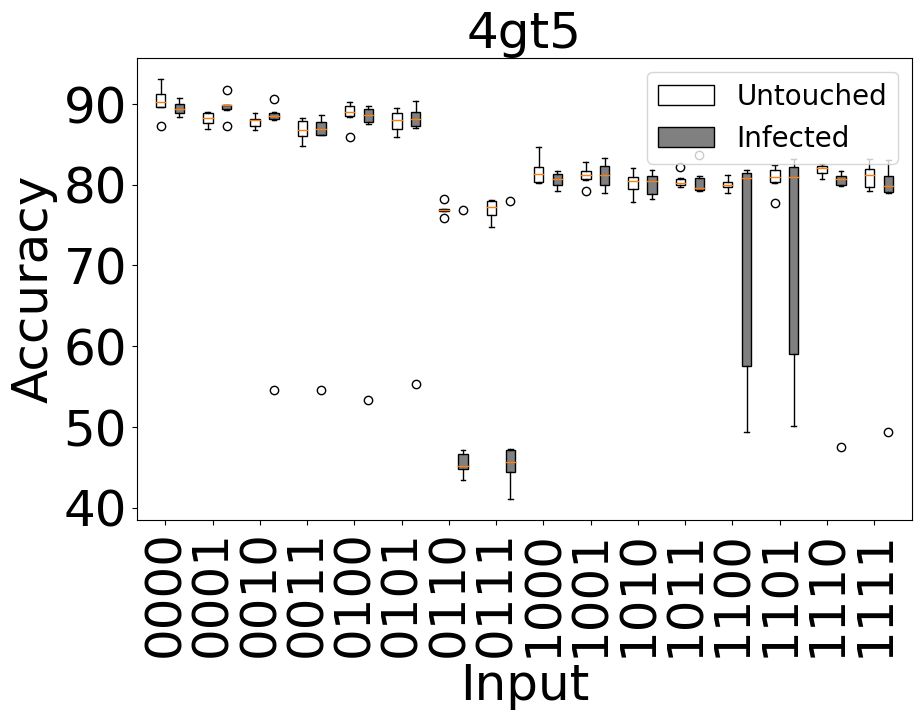

In [7]:
results_correct = {}  # Initialize an empty dictionary to store arrays
results_noisy = {}  # Initialize an empty dictionary to store arrays
# mean_degradation_array=[]
# max_degradation_array=[]
# min_degradation_array=[]

for i, in_qc in enumerate(in_circuits):        
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        results_noisy[rn_name] = []
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        results_correct[rc_name] = []
degradation_flip=[]
degradation_nonflip=[]
degradation=[]

for i, new_qc in enumerate(new_circuit_list):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')

        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')

        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)
        try:
            if ((count_noisy['1']/1000 > 0.5) and (count['0001']/1000 > 0.5)):
                diff = count['0001']-count_noisy['1']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0001']/10)
                results_noisy[rn_name].append(count_noisy['1']/10)
        except KeyError:
            pass
        try:
            if ((count_noisy['0']/1000 > 0.5) and (count['0000']/1000 > 0.5)):
                diff = count['0000']-count_noisy['0']
                degradation_nonflip.append(diff/10)  
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0000']/10)
                results_noisy[rn_name].append(count_noisy['0']/10)     
        except KeyError:
            pass
        try:
            if ((count_noisy['0']/1000 < 0.5) and (count['0000']/1000 > 0.5)):
                diff = count['0000']-count_noisy['0']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0000']/10)
                results_noisy[rn_name].append(count_noisy['0']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['1']/1000 < 0.5) and (count['0001']/1000 > 0.5)):
                diff = count['0001']-count_noisy['1']
                degradation_flip.append(diff/10) 
                degradation.append(diff/10)
                results_correct[rc_name].append(count['0001']/10)
                results_noisy[rn_name].append(count_noisy['1']/10)
        except KeyError:
            pass

       
# for i, in_qc in enumerate(in_circuits):
#     rn_name = f"result_n_{i}"  # Create a string with the desired array name
#     rc_name = f"result_c_{i}"  # Create a string with the desired array name
#     mean_difference=np.mean(results_correct[rc_name])-np.mean(results_noisy[rn_name])
#     mean_degradation_array.append(mean_difference)
#     max_difference=np.max(results_correct[rc_name])-np.min(results_noisy[rn_name])
#     max_degradation_array.append(max_difference)
#     min_difference=np.min(results_correct[rc_name])-np.max(results_noisy[rn_name])
#     min_degradation_array.append(min_difference)

        
avg_degradation_nf=np.mean(degradation_nonflip)   
max_degradation_nf=np.max(degradation_nonflip) 
min_degradation_nf=np.min(degradation_nonflip)    
print(avg_degradation_nf,max_degradation_nf, min_degradation_nf)
avg_degradation_f=np.mean(degradation_flip)   
max_degradation_f=np.max(degradation_flip) 
min_degradation_f=np.min(degradation_flip)    
print(avg_degradation_f,max_degradation_f, min_degradation_f)
avg_degradation=np.mean(degradation)
print(avg_degradation)





import matplotlib.pyplot as plt
import numpy as np

# Extract data from both dictionaries
data_to_plot_correct = list(results_correct.values())
data_to_plot_noisy = list(results_noisy.values())

# Determine the number of keys (assuming both dictionaries have the same keys)
num_keys = len(results_correct)

# Create positions for the side-by-side box plots
positions = np.arange(num_keys)

# Set up the figure
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Custom labels for x-axis (keys)
custom_labels = ['0000','0001', '0010', '0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']  # Replace with your custom labels

# Create side-by-side box plots for each key
for i, (data_correct, data_noisy) in enumerate(zip(data_to_plot_correct, data_to_plot_noisy)):
    position_correct = positions[i]
    position_noisy = positions[i] + 0.4  # Offset for side-by-side arrangement

    box_plot_correct = plt.boxplot(data_correct, positions=[position_correct], widths=0.2, patch_artist=True)
    box_plot_noisy = plt.boxplot(data_noisy, positions=[position_noisy], widths=0.2, patch_artist=True)

    # Customize box colors
    box_plot_correct['boxes'][0].set_facecolor('white')
    box_plot_noisy['boxes'][0].set_facecolor('grey')

# Set x-axis ticks and labels
plt.xticks(positions + 0.1, custom_labels,fontsize=36,rotation=90)
plt.yticks(fontsize=36)
plt.xlabel('Input',fontsize=36)
plt.ylabel('Accuracy',fontsize=36)
plt.title('4gt5',fontsize=36)

# Add legend
plt.legend([box_plot_correct['boxes'][0], box_plot_noisy['boxes'][0]], ['Untouched', 'Infected'],loc='upper right', fontsize=20)

plt.show()


In [6]:
# results_correct = {}  # Initialize an empty dictionary to store arrays
# results_noisy = {}  # Initialize an empty dictionary to store arrays
# mean_degradation_array=[]
# max_degradation_array=[]
# min_degradation_array=[]

# for i, in_qc in enumerate(in_circuits):        
#         rn_name = f"result_n_{i}"  # Create a string with the desired array name
#         results_noisy[rn_name] = []
#         rc_name = f"result_c_{i}"  # Create a string with the desired array name
#         results_correct[rc_name] = []
degradation_flip=[]
degradation_nonflip=[]
degradation=[]

for i, new_qc in enumerate(new_circuit_list):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        #print(f"Input:{i}")
        # rn_name = f"result_n_{i}"  # Create a string with the desired array name
        # rc_name = f"result_c_{i}"  # Create a string with the desired array name
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        #print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        #print(count)


        if ((count_noisy['1']/1000 > 0.5) and (count['0001']/1000 > 0.5)):
            diff = count['0001']-count_noisy['1']
            degradation_nonflip.append(diff/10)
            degradation.append(diff/10)        
        if ((count_noisy['0']/1000 > 0.5) and (count['0000']/1000 > 0.5)):
            diff = count['0000']-count_noisy['0']
            degradation_nonflip.append(diff/10)
            degradation.append(diff/10)        
        if ((count_noisy['0']/1000 < 0.5) and (count['0000']/1000 > 0.5)):
            diff = count['0000']-count_noisy['0']
            degradation_flip.append(diff/10)
            degradation.append(diff/10)        
        if ((count_noisy['1']/1000 < 0.5) and (count['0001']/1000 > 0.5)):
            diff = count['0001']-count_noisy['1']
            degradation_flip.append(diff/10)
            degradation.append(diff/10)
# for i, in_qc in enumerate(in_circuits):
#     rn_name = f"result_n_{i}"  # Create a string with the desired array name
#     rc_name = f"result_c_{i}"  # Create a string with the desired array name
#     mean_difference=np.mean(results_correct[rc_name])-np.mean(results_noisy[rn_name])
#     mean_degradation_array.append(mean_difference)
#     max_difference=np.max(results_correct[rc_name])-np.min(results_noisy[rn_name])
#     max_degradation_array.append(max_difference)
#     min_difference=np.min(results_correct[rc_name])-np.max(results_noisy[rn_name])
#     min_degradation_array.append(min_difference)

        
avg_degradation_nf=np.mean(degradation_nonflip)   
max_degradation_nf=np.max(degradation_nonflip) 
min_degradation_nf=np.min(degradation_nonflip)    
print(avg_degradation_nf,max_degradation_nf, min_degradation_nf)
avg_degradation_f=np.mean(degradation_flip)   
max_degradation_f=np.max(degradation_flip) 
min_degradation_f=np.min(degradation_flip)    
print(avg_degradation_f,max_degradation_f, min_degradation_f)
avg_degradation=np.mean(degradation)
print(avg_degradation)

'''
import matplotlib.pyplot as plt
import numpy as np

# Extract data from both dictionaries
data_to_plot_correct = list(results_correct.values())
data_to_plot_noisy = list(results_noisy.values())

# Determine the number of keys (assuming both dictionaries have the same keys)
num_keys = len(results_correct)

# Create positions for the side-by-side box plots
positions = np.arange(num_keys)

# Set up the figure
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Custom labels for x-axis (keys)
custom_labels = ['0000','0001', '0010', '0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']  # Replace with your custom labels

# Create side-by-side box plots for each key
for i, (data_correct, data_noisy) in enumerate(zip(data_to_plot_correct, data_to_plot_noisy)):
    position_correct = positions[i]
    position_noisy = positions[i] + 0.4  # Offset for side-by-side arrangement

    box_plot_correct = plt.boxplot(data_correct, positions=[position_correct], widths=0.2, patch_artist=True)
    box_plot_noisy = plt.boxplot(data_noisy, positions=[position_noisy], widths=0.2, patch_artist=True)

    # Customize box colors
    box_plot_correct['boxes'][0].set_facecolor('white')
    box_plot_noisy['boxes'][0].set_facecolor('grey')

# Set x-axis ticks and labels
plt.xticks(positions + 0.1, custom_labels,fontsize=36,rotation=90)
plt.yticks(fontsize=36)
plt.xlabel('Input',fontsize=36)
plt.ylabel('Accuracy',fontsize=36)
plt.title('4gt5',fontsize=36)

# Add legend
plt.legend([box_plot_correct['boxes'][0], box_plot_noisy['boxes'][0]], ['Untouched', 'Infected'],fontsize=20,loc ='lower left')

plt.show()
'''

Infected circuit 0
Infected circuit 1
Infected circuit 2
Infected circuit 3
Infected circuit 4
Infected circuit 5
0.038157894736842134 3.5 -4.7
63.11 68.7 58.8
13.178125000000001


"\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Extract data from both dictionaries\ndata_to_plot_correct = list(results_correct.values())\ndata_to_plot_noisy = list(results_noisy.values())\n\n# Determine the number of keys (assuming both dictionaries have the same keys)\nnum_keys = len(results_correct)\n\n# Create positions for the side-by-side box plots\npositions = np.arange(num_keys)\n\n# Set up the figure\nplt.figure(figsize=(10, 6))\nax = plt.subplot(111)\n\n# Custom labels for x-axis (keys)\ncustom_labels = ['0000','0001', '0010', '0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']  # Replace with your custom labels\n\n# Create side-by-side box plots for each key\nfor i, (data_correct, data_noisy) in enumerate(zip(data_to_plot_correct, data_to_plot_noisy)):\n    position_correct = positions[i]\n    position_noisy = positions[i] + 0.4  # Offset for side-by-side arrangement\n\n    box_plot_correct = plt.boxplot(data_correct, posi

Infected circuit 0
Input:0
{'0': 901, '1': 99}
{'0000': 922, '0001': 78}
diff=-21
Input:1
{'0': 861, '1': 139}
{'0000': 889, '0001': 111}
diff=-28
Input:2
{'0': 881, '1': 119}
{'0000': 908, '0001': 92}
diff=-27
Input:3
{'0': 869, '1': 131}
{'0000': 860, '0001': 140}
diff=9
Input:4
{'0': 864, '1': 136}
{'0000': 887, '0001': 113}
diff=-23
Input:5
{'0': 868, '1': 132}
{'0000': 884, '0001': 116}
diff=-16
Input:6
{'0': 887, '1': 113}
{'0000': 224, '0001': 776}
Input:7
{'0': 849, '1': 151}
{'0000': 224, '0001': 776}
Input:8
{'0': 202, '1': 798}
{'0000': 173, '0001': 827}
diff=-29
Input:9
{'0': 197, '1': 803}
{'0000': 184, '0001': 816}
diff=-13
Input:10
{'0': 175, '1': 825}
{'0000': 179, '0001': 821}
diff=4
Input:11
{'0': 176, '1': 824}
{'0000': 192, '0001': 808}
diff=16
Input:12
{'0': 805, '1': 195}
{'0000': 183, '0001': 817}
Input:13
{'0': 820, '1': 180}
{'0000': 188, '0001': 812}
Input:14
{'0': 199, '1': 801}
{'0000': 184, '0001': 816}
diff=-15
Input:15
{'0': 203, '1': 797}
{'0000': 163, '

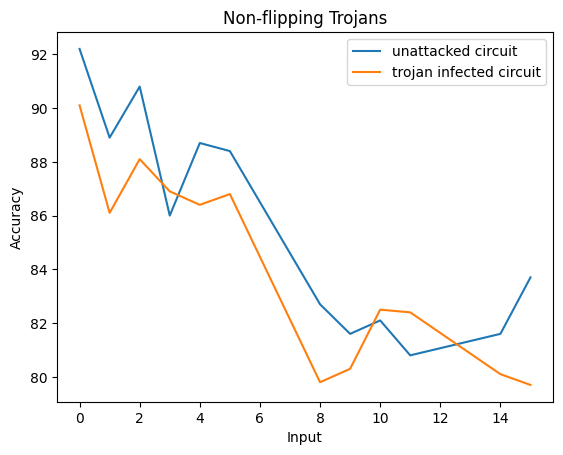

<Figure size 640x480 with 0 Axes>

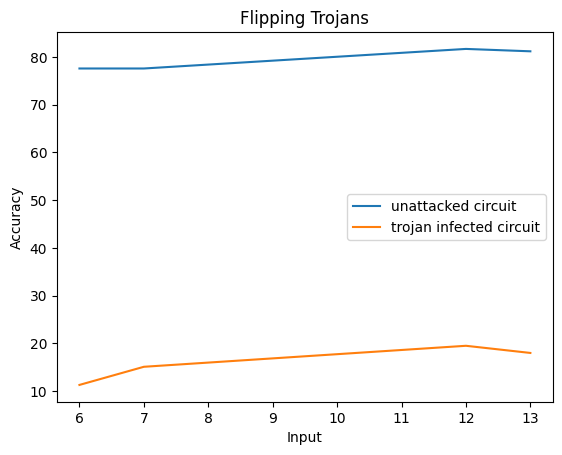

Infected circuit 1
Input:0
{'0': 907, '1': 93}
{'0000': 884, '0001': 116}
diff=23
Input:1
{'0': 871, '1': 129}
{'0000': 869, '0001': 131}
diff=2
Input:2
{'0': 899, '1': 101}
{'0000': 881, '0001': 119}
diff=18
Input:3
{'0': 869, '1': 131}
{'0000': 866, '0001': 134}
diff=3
Input:4
{'0': 862, '1': 138}
{'0000': 884, '0001': 116}
diff=-22
Input:5
{'0': 865, '1': 135}
{'0000': 875, '0001': 125}
diff=-10
Input:6
{'0': 875, '1': 125}
{'0000': 226, '0001': 774}
Input:7
{'0': 855, '1': 145}
{'0000': 243, '0001': 757}
Input:8
{'0': 190, '1': 810}
{'0000': 166, '0001': 834}
diff=-24
Input:9
{'0': 173, '1': 827}
{'0000': 185, '0001': 815}
diff=12
Input:10
{'0': 187, '1': 813}
{'0000': 183, '0001': 817}
diff=-4
Input:11
{'0': 176, '1': 824}
{'0000': 192, '0001': 808}
diff=16
Input:12
{'0': 836, '1': 164}
{'0000': 209, '0001': 791}
Input:13
{'0': 820, '1': 180}
{'0000': 194, '0001': 806}
Input:14
{'0': 178, '1': 822}
{'0000': 188, '0001': 812}
diff=10
Input:15
{'0': 209, '1': 791}
{'0000': 166, '000

<Figure size 640x480 with 0 Axes>

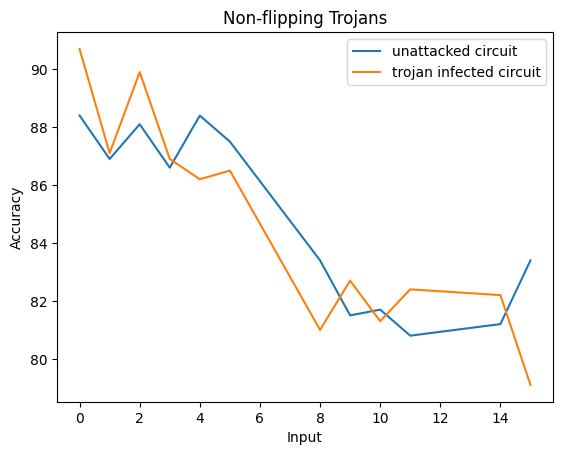

<Figure size 640x480 with 0 Axes>

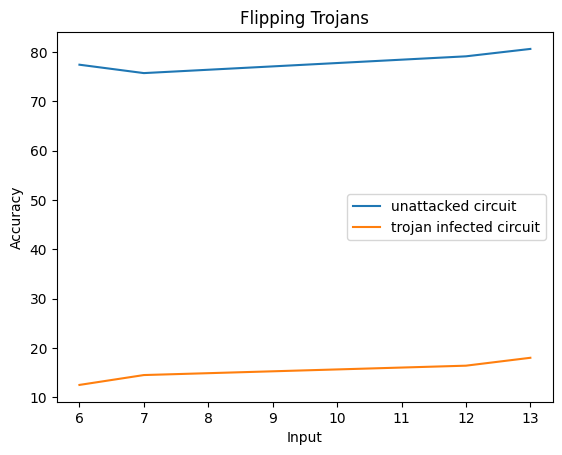

Infected circuit 2
Input:0
{'0': 907, '1': 93}
{'0000': 900, '0001': 100}
diff=7
Input:1
{'0': 867, '1': 133}
{'0000': 901, '0001': 99}
diff=-34
Input:2
{'0': 878, '1': 122}
{'0000': 856, '0001': 144}
diff=22
Input:3
{'0': 863, '1': 137}
{'0000': 852, '0001': 148}
diff=11
Input:4
{'0': 894, '1': 106}
{'0000': 877, '0001': 123}
diff=17
Input:5
{'0': 880, '1': 120}
{'0000': 891, '0001': 109}
diff=-11
Input:6
{'0': 214, '1': 786}
{'0000': 249, '0001': 751}
diff=35
Input:7
{'0': 236, '1': 764}
{'0000': 244, '0001': 756}
diff=8
Input:8
{'0': 165, '1': 835}
{'0000': 203, '0001': 797}
diff=38
Input:9
{'0': 183, '1': 817}
{'0000': 192, '0001': 808}
diff=9
Input:10
{'0': 187, '1': 813}
{'0000': 168, '0001': 832}
diff=-19
Input:11
{'0': 208, '1': 792}
{'0000': 199, '0001': 801}
diff=-9
Input:12
{'0': 186, '1': 814}
{'0000': 191, '0001': 809}
diff=5
Input:13
{'0': 191, '1': 809}
{'0000': 189, '0001': 811}
diff=-2
Input:14
{'0': 199, '1': 801}
{'0000': 173, '0001': 827}
diff=-26
Input:15
{'0': 190

<Figure size 640x480 with 0 Axes>

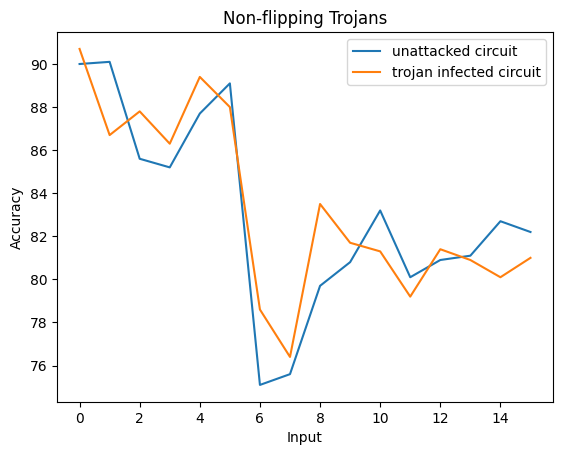

<Figure size 640x480 with 0 Axes>

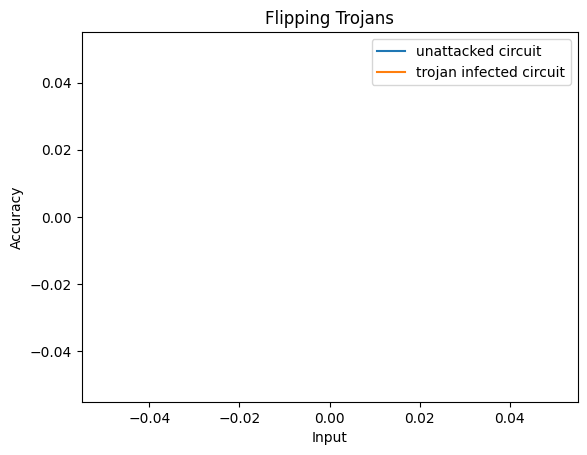

Infected circuit 3
Input:0
{'0': 889, '1': 111}
{'0000': 895, '0001': 105}
diff=-6
Input:1
{'0': 892, '1': 108}
{'0000': 884, '0001': 116}
diff=8
Input:2
{'0': 253, '1': 747}
{'0000': 874, '0001': 126}
Input:3
{'0': 213, '1': 787}
{'0000': 872, '0001': 128}
Input:4
{'0': 904, '1': 96}
{'0000': 870, '0001': 130}
diff=34
Input:5
{'0': 902, '1': 98}
{'0000': 871, '0001': 129}
diff=31
Input:6
{'0': 866, '1': 134}
{'0000': 223, '0001': 777}
Input:7
{'0': 850, '1': 150}
{'0000': 256, '0001': 744}
Input:8
{'0': 192, '1': 808}
{'0000': 184, '0001': 816}
diff=-8
Input:9
{'0': 176, '1': 824}
{'0000': 184, '0001': 816}
diff=8
Input:10
{'0': 197, '1': 803}
{'0000': 213, '0001': 787}
diff=16
Input:11
{'0': 197, '1': 803}
{'0000': 204, '0001': 796}
diff=7
Input:12
{'0': 210, '1': 790}
{'0000': 215, '0001': 785}
diff=5
Input:13
{'0': 192, '1': 808}
{'0000': 223, '0001': 777}
diff=31
Input:14
{'0': 185, '1': 815}
{'0000': 196, '0001': 804}
diff=11
Input:15
{'0': 194, '1': 806}
{'0000': 192, '0001': 80

<Figure size 640x480 with 0 Axes>

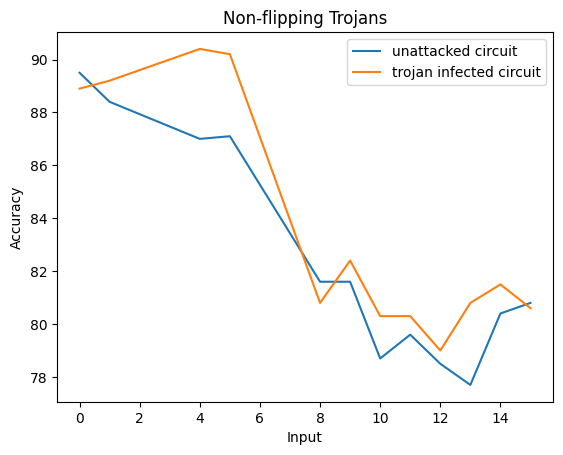

<Figure size 640x480 with 0 Axes>

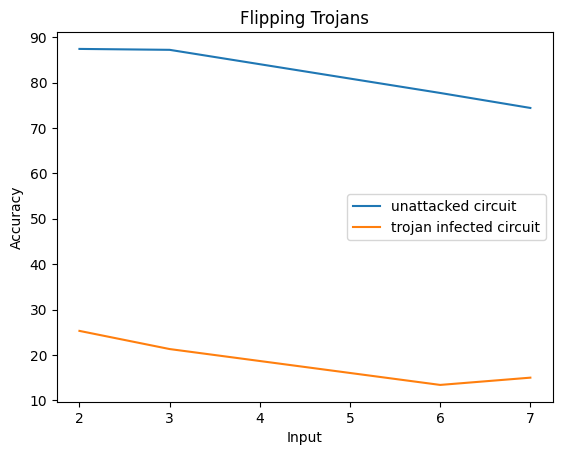

Infected circuit 4
Input:0
{'0': 869, '1': 131}
{'0000': 908, '0001': 92}
diff=-39
Input:1
{'0': 853, '1': 147}
{'0000': 893, '0001': 107}
diff=-40
Input:2
{'0': 930, '1': 70}
{'0000': 885, '0001': 115}
diff=45
Input:3
{'0': 876, '1': 124}
{'0000': 865, '0001': 135}
diff=11
Input:4
{'0': 206, '1': 794}
{'0000': 900, '0001': 100}
Input:5
{'0': 228, '1': 772}
{'0000': 889, '0001': 111}
Input:6
{'0': 908, '1': 92}
{'0000': 239, '0001': 761}
Input:7
{'0': 883, '1': 117}
{'0000': 251, '0001': 749}
Input:8
{'0': 221, '1': 779}
{'0000': 219, '0001': 781}
diff=-2
Input:9
{'0': 197, '1': 803}
{'0000': 207, '0001': 793}
diff=10
Input:10
{'0': 189, '1': 811}
{'0000': 187, '0001': 813}
diff=-2
Input:11
{'0': 199, '1': 801}
{'0000': 185, '0001': 815}
diff=-14
Input:12
{'0': 197, '1': 803}
{'0000': 198, '0001': 802}
diff=1
Input:13
{'0': 183, '1': 817}
{'0000': 165, '0001': 835}
diff=-18
Input:14
{'0': 186, '1': 814}
{'0000': 175, '0001': 825}
diff=-11
Input:15
{'0': 177, '1': 823}
{'0000': 186, '00

<Figure size 640x480 with 0 Axes>

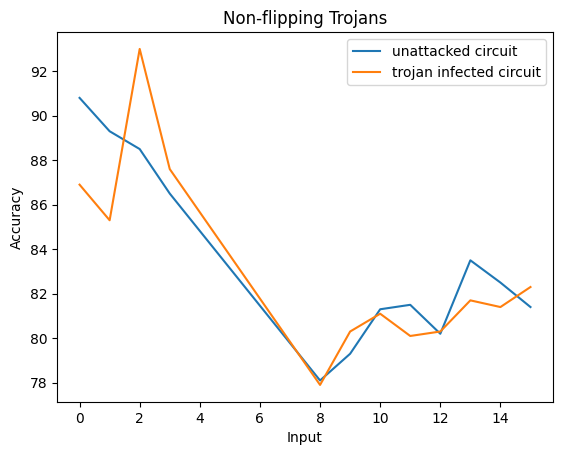

<Figure size 640x480 with 0 Axes>

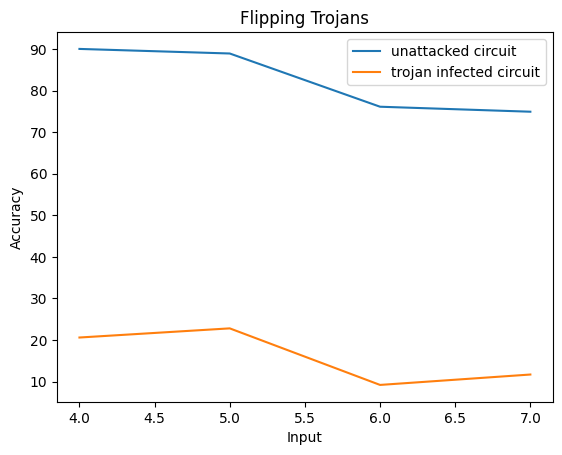

Infected circuit 5
Input:0
{'0': 890, '1': 110}
{'0000': 909, '0001': 91}
diff=-19
Input:1
{'0': 886, '1': 114}
{'0000': 889, '0001': 111}
diff=-3
Input:2
{'0': 888, '1': 112}
{'0000': 874, '0001': 126}
diff=14
Input:3
{'0': 871, '1': 129}
{'0000': 869, '0001': 131}
diff=2
Input:4
{'0': 868, '1': 132}
{'0000': 885, '0001': 115}
diff=-17
Input:5
{'0': 875, '1': 125}
{'0000': 883, '0001': 117}
diff=-8
Input:6
{'0': 875, '1': 125}
{'0000': 229, '0001': 771}
Input:7
{'0': 871, '1': 129}
{'0000': 223, '0001': 777}
Input:8
{'0': 197, '1': 803}
{'0000': 202, '0001': 798}
diff=5
Input:9
{'0': 227, '1': 773}
{'0000': 203, '0001': 797}
diff=-24
Input:10
{'0': 212, '1': 788}
{'0000': 204, '0001': 796}
diff=-8
Input:11
{'0': 193, '1': 807}
{'0000': 196, '0001': 804}
diff=3
Input:12
{'0': 211, '1': 789}
{'0000': 215, '0001': 785}
diff=4
Input:13
{'0': 194, '1': 806}
{'0000': 207, '0001': 793}
diff=13
Input:14
{'0': 811, '1': 189}
{'0000': 185, '0001': 815}
Input:15
{'0': 809, '1': 191}
{'0000': 196

<Figure size 640x480 with 0 Axes>

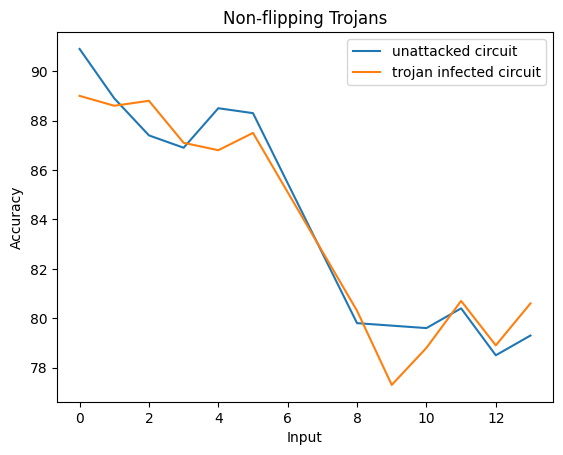

<Figure size 640x480 with 0 Axes>

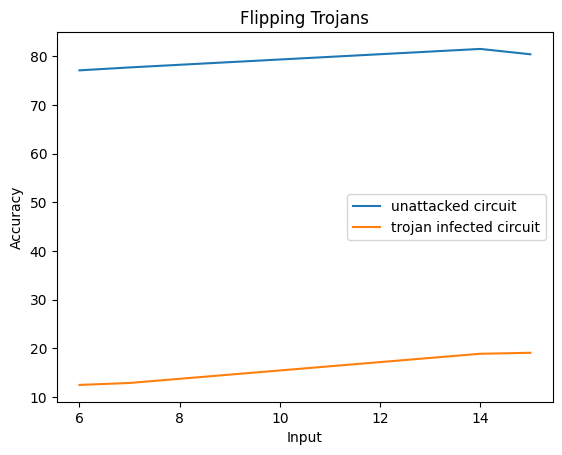

<Figure size 640x480 with 0 Axes>

In [6]:
for i, new_qc in enumerate(new_circuit_list):
    results_noisy = [] 
    results_correct_flip =[]
    results_correct =[]
    results_noisy_flip =[]
    flip_circuits=[]
    non_flip_circuits=[]
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        


        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)

        if (count['0000']/1000 > 0.5):
            if (count_noisy['0']/1000 > 0.5):
                diff = count_noisy['0']-count['0000']
                print(f"diff={diff}")
                results_correct.append(count['0000']/10)
                results_noisy.append(count_noisy['0']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0000']/10)
                results_noisy_flip.append(count_noisy['0']/10)
                flip_circuits.append(i)

        if (count['0001']/1000 > 0.5):
            if (count_noisy['1']/1000 > 0.5):
                diff = count_noisy['1']-count['0001']
                print(f"diff={diff}") 
                results_correct.append(count['0001']/10)
                results_noisy.append(count_noisy['1']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['0001']/10)
                results_noisy_flip.append(count_noisy['1']/10)
                flip_circuits.append(i)

    import matplotlib.pyplot as plt
    import numpy as np

    # Assuming 'array1' and 'array2' are your arrays of data

    # Plot the data from both arrays
    plt.figure()  
    plt.plot(non_flip_circuits, results_correct, label='unattacked circuit')
    plt.plot(non_flip_circuits, results_noisy, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Non-flipping Trojans')


    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.clf()  # Clear the plot to create a new one

    plt.figure()  
    plt.plot(flip_circuits, results_correct_flip, label='unattacked circuit')
    plt.plot(flip_circuits, results_noisy_flip, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Flipping Trojans')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()
    plt.clf()  # Clear the plot to create a new one

